# Prediction Using Decision Tree

## Objective:
Create the Decision Tree classifier and visualize it graphically.
● The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly. 

## Author: Imran Roshan


## Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import graphviz


## Reading the data set


In [2]:
df= pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## Shape of the data set

In [4]:
df.shape

(150, 6)

## checking null values

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Check the unique values [Species]

In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Count the value of each specie

In [7]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## check data type of all featuers


In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## drop irrelavant columns

In [9]:
df = df.drop(["Id"],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Descriptive Statistics Function

In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Exploratory Data Analysis


<AxesSubplot:>

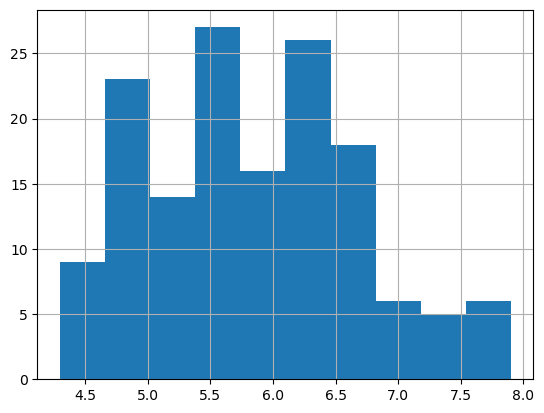

In [12]:
df["SepalLengthCm"].hist()

<AxesSubplot:>

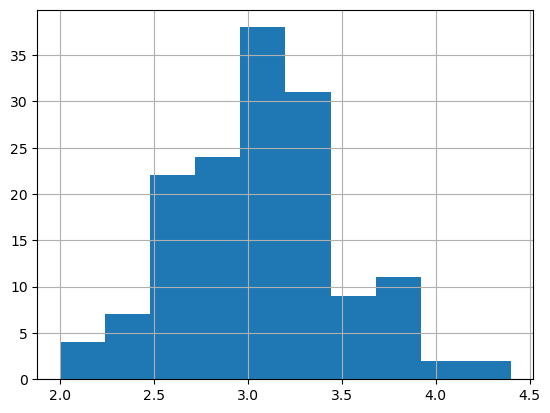

In [13]:
df["SepalWidthCm"].hist()

<AxesSubplot:>

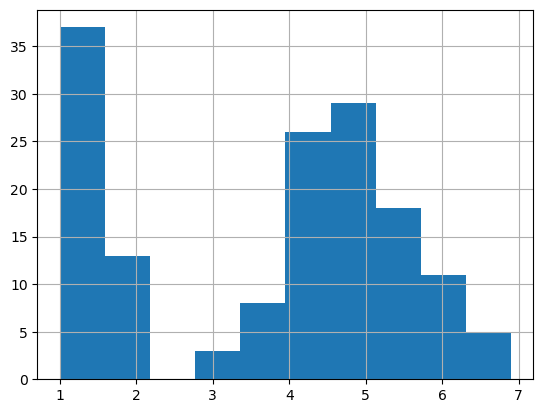

In [14]:
df["PetalLengthCm"].hist()

<AxesSubplot:>

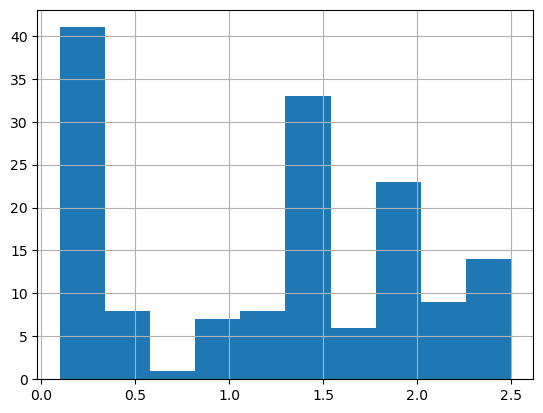

In [15]:
df["PetalWidthCm"].hist()

## Scatter Plot

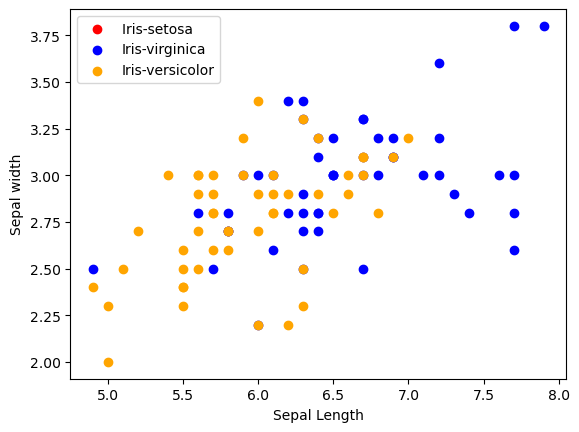

In [16]:
colors = ['red','blue','orange']
species=["Iris-setosa ","Iris-virginica","Iris-versicolor"]


for i in range(3):
    x=df[df["Species"]==species[i]]
    plt.scatter(x["SepalLengthCm"],x["SepalWidthCm"],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")
plt.legend()

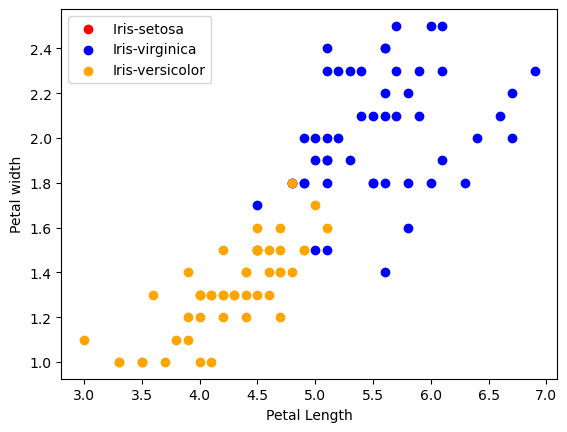

In [28]:
for i in range(3):
    x=df[df["Species"]==species[i]]
    plt.scatter(x["PetalLengthCm"],x["PetalWidthCm"],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal width")
plt.legend()

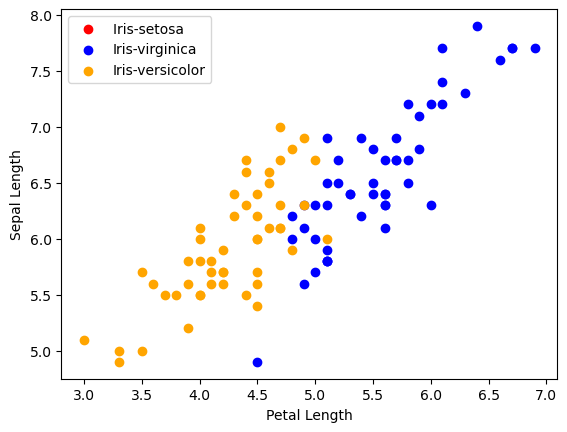

In [17]:
for i in range(3):
    x=df[df["Species"]==species[i]]
    plt.scatter(x["PetalLengthCm"],x["SepalLengthCm"],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.legend()

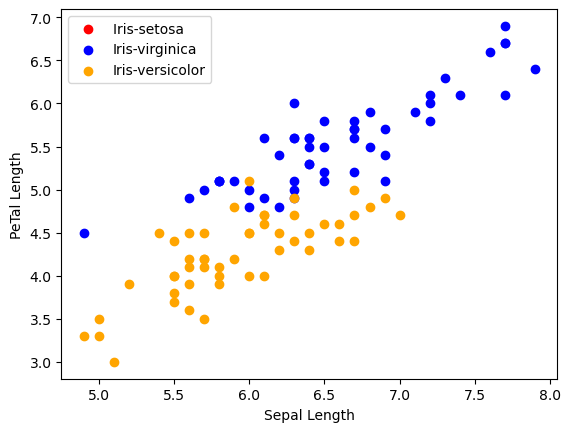

In [18]:
for i in range(3):
    x=df[df["Species"]==species[i]]
    plt.scatter(x["SepalLengthCm"],x["PetalLengthCm"],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("PeTal Length")
plt.legend()

## Coefficient Correlation between features

In [19]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Heat map

<AxesSubplot:>

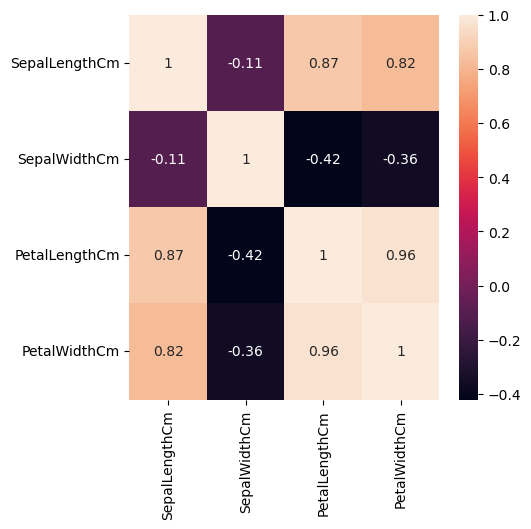

In [20]:
corr = df.corr()
plt.figure(figsize=(5,5))
top_features = corr.index
sns.heatmap(df[corr.index].corr(),annot=True)

## Label encoding

In [21]:
# Use lable encoding for catagorial features into numeric form for ML model


le = LabelEncoder()



In [22]:
df['Species'] = le.fit_transform(df["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [24]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

## Preparing the data


In [25]:
X=df.drop(["Species"],axis=1)
y=df["Species"]


## Spliting the data into trian and test


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=0)

## Check Model Using Decsion Tree Algorithum

In [27]:

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",clf.score(X_test,y_test))


Accuracy: 0.9428571428571428


## Comparing Actual vs Predicted

In [28]:
df_Decision = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_Decision

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
...,...,...
38,0,0
5,0,0
53,1,1
143,2,2


## Check Model using KNN Algorithm

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",knn.score(X_test,y_test))
Accuracy: 0.9142857142857143
# Comparing Actual vs Predicted
df_KNN = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_KNN

Accuracy: 0.9142857142857143


C:\Users\IMRAN ROSHAN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\IMRAN ROSHAN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
...,...,...
38,0,0
5,0,0
53,1,1
143,2,2


## Check Model Using Logistic Regression Algorithm

In [29]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor= regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Accuracy:",regressor.score(X_test,y_test))

Accuracy: 0.9047619047619048


C:\Users\IMRAN ROSHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
y_test

114    2
62     1
33     0
107    2
7      0
      ..
38     0
5      0
53     1
143    2
105    2
Name: Species, Length: 105, dtype: int32

# Comparing Actual vs Predicted

In [31]:

df_Log = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_Log     # Comparing Actual vs Predicted
df_Log = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_Log

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
...,...,...
38,0,0
5,0,0
53,1,1
143,2,2


In [32]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

## Visualize the Decision Tree

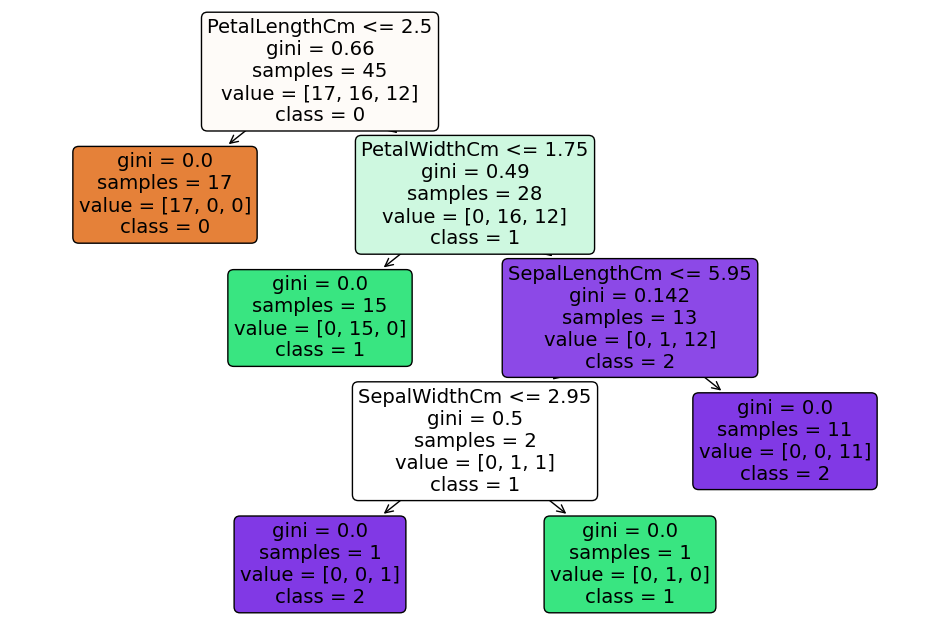

In [42]:
from sklearn import tree
import matplotlib.pyplot as plt

# Train a decision tree classifier
clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)

# Visualize the decision tree
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, 
                           feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                           class_names=['0','1','2'],  
                           filled=True, rounded=True


plt.show()
